In [109]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sb

In [110]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


<AxesSubplot:>

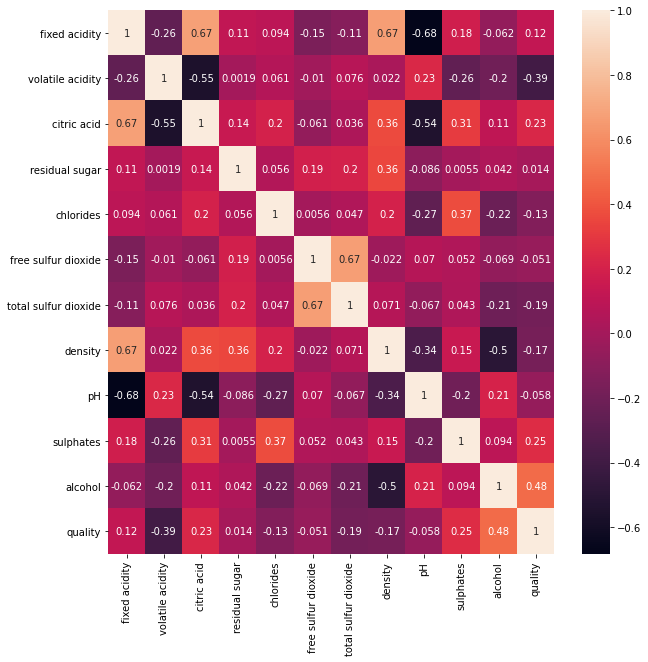

In [111]:
fig, ax = plt.subplots(figsize=(10,10))   
sb.heatmap(data.corr(), annot=True, ax= ax)

In [112]:
x = data.loc[:, data.columns != 'quality'].to_numpy()
y = data.loc[:, data.columns == 'quality'].to_numpy().tolist()
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [113]:
y = np.array(y)
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]])

In [114]:
x_train = []
y_train = []

x_test = []
y_test = []

for i in range(len(data)):
    if i <= int(len(data) * 0.8) : 
        x_train.append(x[i])
        y_train.append(y[i])
    elif  i > int(len(data) * 0.8) :
        y_test.append(y[i])
        x_test.append(x[i])


x_train = np.array(x_train)
y_train = np.array(y_train)
y_test  = np.array(y_test)
x_test = np.array(x_test)

In [115]:
pr = LinearRegression()

In [116]:
quadratic = PolynomialFeatures(degree=2)

In [117]:
x_quad = quadratic.fit_transform(x_train)

In [118]:
x_test = quadratic.fit_transform(x_test)

In [119]:
pr.fit(x_quad, y_train)

LinearRegression()

In [120]:
y_quad_predict = pr.predict(x_test)

In [121]:
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
mean_squared_error(y_test, y_quad_predict)

0.47522275328905145

In [123]:
r2_score(y_test, y_quad_predict)

0.20886132582784467

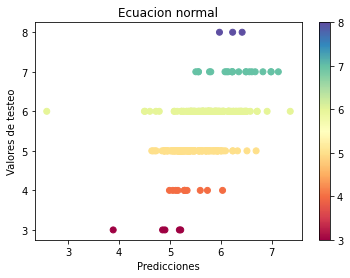

In [124]:
plt.scatter(y_quad_predict, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Ecuacion normal')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

In [125]:
y_test[:10]

array([[6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5]])

In [126]:
y_quad_predict[:10]

array([[5.75893842],
       [5.75893842],
       [5.69183979],
       [5.42719094],
       [5.91177804],
       [5.7152065 ],
       [6.50700075],
       [5.69358457],
       [5.29141008],
       [5.29141008]])

In [127]:
 def Root_Mean_Squared_Error(y_test, predictions):
    mean_squared_error = 0
    n = len(y_test)
    for i in range(len(y_test)):
        mean_squared_error =  (np.square((y_test[i] - predictions[i])) + mean_squared_error)
    root_squared_error = np.sqrt(mean_squared_error/n)
    return root_squared_error

In [128]:
Root_Mean_Squared_Error(y_test, y_quad_predict)

array([0.68936402])